# Scrape Instagram posts

In [30]:
# import wget
import pandas as pd  
import numpy  as np
# from   geopy.geocoders import Nominatim
# import altair as alt
import vega 
# from   vega_datasets import data # for state contours
from instascrape import Profile, scrape_posts
import matplotlib.pyplot as plt
from selenium.webdriver import Chrome
import json
import pprint

In [77]:
#alt.renderers.enable('notebook'); # for rendering in jupyter notebook

In [2]:
webdriver = Chrome("/Users/lisekerckhove/tajo-techatelier-insta/chromedriver")

In [10]:
my_session_id = '589504420%3AfAk0TjUm1JhMxC%3A1'


In [11]:
headers = {
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Mobile Safari/537.36 Edg/87.0.664.57",
    "cookie": f"sessionid={my_session_id};"
}
print(headers)

{'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Mobile Safari/537.36 Edg/87.0.664.57', 'cookie': 'sessionid=589504420%3AfAk0TjUm1JhMxC%3A1;'}


In [12]:
lise = Profile('lisekerckhove')
lise.scrape(headers=headers)

#lise.get_posts()

In [13]:
lise_recent_posts = lise.get_recent_posts()

In [14]:
lise_recent_posts

[<Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>]

In [16]:
joe = Profile('joebiden')
joe.scrape()

In [17]:
joe_recent_posts = joe.get_recent_posts()

In [21]:
print(joe)

<Profile>


In [26]:
joe_json = joe.json_dict

In [31]:
pprint.pprint(joe_json)

{'browser_push_pub_key': 'BIBn3E_rWTci8Xn6P9Xj3btShT85Wdtne0LtwNUyRQ5XjFNkuTq9j4MPAVLvAFhXrUU1A9UxyxBA7YIOjqDIDHI',
 'bundle_variant': 'es6',
 'cache_schema_version': 3,
 'config': {'csrf_token': 'lXZhotnASdsMaPheu9KIJj26VxpYBF1p',
            'viewer': None,
            'viewerId': None},
 'connection_quality_rating': 'EXCELLENT',
 'consent_dialog_config': {'is_user_linked_to_fb': False,
                           'should_show_consent_dialog': True,
                           'use_logged_out_3p_consent_dialog': True},
 'country_code': 'BE',
 'deployment_stage': 'c1',
 'device_id': '9F17496B-0154-4F4C-AA41-AFCAEBC3BF6F',
 'encryption': {'key_id': '221',
                'public_key': 'f3fb91c7bf309d2ee7d9ff8c65995ee2b0ad1a3d62220f9b0cfd0755eaada94f',
                'version': '10'},
 'entry_data': {'ProfilePage': [{'always_show_message_button_to_pro_account': False,
                                 'graphql': {'user': {'biography': 'Husband to '
                                        

                                                                                                                                                              'to '
                                                                                                                                                              'take '
                                                                                                                                                              'on '
                                                                                                                                                              'our '
                                                                                                                                                              'challenges '
                                                                                                                                                              'like '
   

                                                                                                                                                                      'profile_pic_url': 'https://scontent-bru2-1.cdninstagram.com/v/t51.2885-19/s150x150/123799454_101940858376421_5689083390318169611_n.jpg?tp=1&_nc_ht=scontent-bru2-1.cdninstagram.com&_nc_ohc=CkZxhGFIYrwAX_edXd7&edm=ABfd0MgBAAAA&ccb=7-4&oh=81060128a556cd0b1452c933c9dc16bf&oe=60B34F9D&_nc_sid=7bff83',
                                                                                                                                                                      'username': 'staceyabrams'},
                                                                                                                                                             'x': 0.5,
                                                                                                                                                             'y': 0.500854687

                                                                                                           'edge_liked_by': {'count': 915344},
                                                                                                           'edge_media_preview_like': {'count': 915344},
                                                                                                           'edge_media_to_caption': {'edges': [{'node': {'text': 'Get '
                                                                                                                                                                 'vaccinated, '
                                                                                                                                                                 'America.'}}]},
                                                                                                           'edge_media_to_comment': {'count': 18738},
                                 

                                                                                          {'node': {'full_name': 'Kendall',
                                                                                                    'id': '6380930',
                                                                                                    'is_private': False,
                                                                                                    'is_verified': True,
                                                                                                    'profile_pic_url': 'https://scontent-bru2-1.cdninstagram.com/v/t51.2885-19/s150x150/135811429_139036817943437_5718038198453340319_n.jpg?tp=1&_nc_ht=scontent-bru2-1.cdninstagram.com&_nc_ohc=7nywFWTyjE8AX_O74Mg&edm=ABfd0MgBAAAA&ccb=7-4&oh=a8e5adbdde81ebd5a282d1cd1317a37b&oe=60B4D43D&_nc_sid=7bff83',
                                                                                                    'username': 'kenda

                                  '10': False,
                                  '11': False,
                                  '9': False},
                            'qex': True},
                     '49': {'l': {}, 'p': {'0': False}, 'qex': True},
                     '50': {'l': {}, 'p': {'0': False}, 'qex': True},
                     '54': {'l': {}, 'p': {'0': False}, 'qex': True},
                     '58': {'l': {}, 'p': {'0': 0.25, '1': True}, 'qex': True},
                     '59': {'l': {}, 'p': {'0': True}, 'qex': True},
                     '62': {'l': {}, 'p': {'0': False}, 'qex': True},
                     '67': {'l': {},
                            'p': {'0': True,
                                  '1': True,
                                  '2': True,
                                  '3': True,
                                  '4': False,
                                  '5': True,
                                  '7': False},
                            'qex'

In [62]:
kylie.json_dict

NameError: name 'kylie' is not defined

In [33]:
#joes_recent_posts = joe.get_recent_posts()

#print(joes_recent_posts)
posts_data = [post.to_dict() for post in joes_recent_posts]
posts_df = pd.DataFrame(posts_data)
print(posts_df[['upload_date', 'comments', 'likes']])


           upload_date  comments   likes
0  2021-05-02 01:17:11      2476  279323
1  2021-05-01 21:50:46      2375  105105
2  2021-05-01 18:43:18      5969  631901
3  2021-05-01 00:50:34      6423  372105
4  2021-04-29 18:12:10      8972  526353
5  2021-04-28 17:05:23      6226  573234
6  2021-04-27 00:09:54      7901  229051
7  2021-04-25 23:03:18     18738  915344
8  2021-04-24 18:42:56     49228  190890
9  2021-04-23 18:00:28      6092  128472
10 2021-04-20 19:26:17      5590  147625
11 2021-04-19 22:35:25      4485  294527


In [34]:
plt.style.use('seaborn-darkgrid')

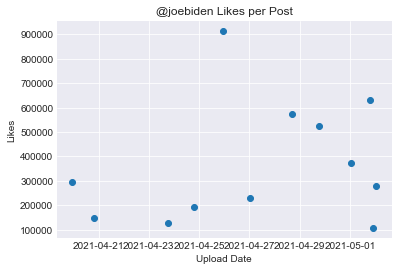

In [35]:
plt.scatter(posts_df.upload_date, posts_df.likes)  # Plot the data
plt.xlabel('Upload Date')              # Write labels
plt.ylabel('Likes')
plt.title('@joebiden Likes per Post')
plt.show()  

## Create dependencies

In [53]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,instascrape,altair,vega,vega_datasets,watermark 

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.11.1

wget         : not installed
pandas       : 1.2.3
numpy        : 1.18.1
instascrape  : unknown
altair       : 4.1.0
vega         : 3.4.0
vega_datasets: not installed
watermark    : 2.2.0

Compiler    : Clang 11.0.0 (clang-1100.0.33.17)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

 
Last updated: Sun Apr 11 2021 12:15:18CEST

